In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
crop_img = cv2.imread("images/edit_test.jpg")
print(crop_img.shape)
#plt.imshow(crop_img)

(640, 640, 3)


# Apply Opencv library (Generate Negative Image)

In [3]:
cvt_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
#plt.imshow(cvt_img)

In [4]:
gray = cv2.imread("images/edit_test.jpg", 0)
#plt.imshow(gray)

In [5]:
colored_negative = abs(255 - cvt_img)
#plt.imshow(colored_negative)

In [6]:
gray_negative = abs(255 - gray)
#plt.imshow(gray_negative)

Output:

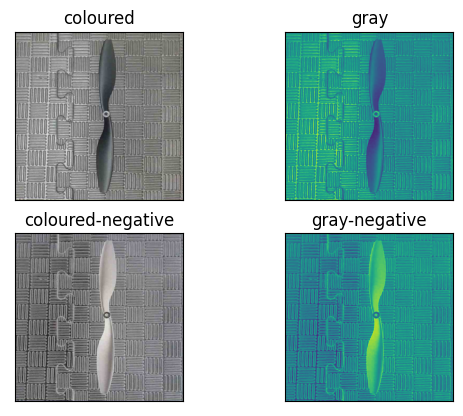

In [7]:
image_list = [cvt_img, gray, colored_negative, gray_negative]
labels = ['coloured', 'gray', 'coloured-negative', 'gray-negative']

"""
plt.subplot(2, 2, 1)
plt.title(title[0])
plt.imshow(imgs[0])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title(title[1])
plt.imshow(imgs[1])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.title(title[2])
plt.imshow(imgs[2])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.title(title[3])
plt.imshow(imgs[3])
plt.xticks([])
plt.yticks([])

plt.show()
"""

for i in range(len(image_list)):
    plt.subplot(2, 2, i+1)
    plt.title(labels[i])
    plt.imshow(image_list[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# USE Imgaug library

https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html

In [8]:
import imageio
import imgaug as ia 
import imgaug.augmenters as iaa
import ipyplot as iplot

In [9]:
input_img = imageio.v2.imread("images/3.jpg")

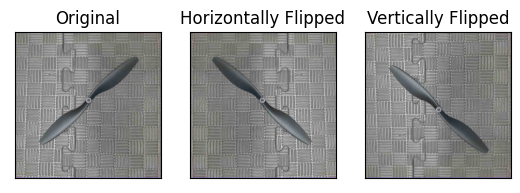

In [10]:
#Horizontal Flip
hflip = iaa.Fliplr(p=1.0)
input_hf = hflip.augment_image(input_img)

#Vertical Flip
vflip = iaa.Flipud(p=1.0)
input_vf = vflip.augment_image(input_img)
#images_list = [input_img, input_hf, input_vf]
#labels = ['Original', 'Horizontally Flipped', 'Vertically Flipped']
#iplot.plot_images(images_list, labels=labels, img_width=180)

image_list = [input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally Flipped', 'Vertically Flipped']

for i in range(len(image_list)):
    plt.subplot(1, 3, i+1)
    plt.title(labels[i])
    plt.imshow(image_list[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

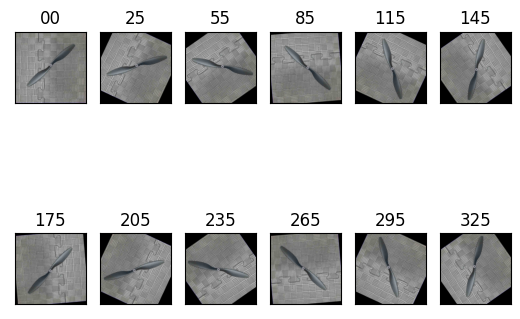

In [23]:
image_list = [input_img]
labels = ['00']

for i in range(25, 355, 30):
    rotation = iaa.Affine(rotate=(-i, i))
    input_rotate = rotation.augment_image(input_img)
    image_list.append(input_rotate)
    labels.append(str(i))


for i in range(len(image_list)):
    
    #isWritten = cv2.imwrite('E:/Thesis_Task/Augmentation/augmented_images/00'+'_'+labels[i]+'_.jpg', image_list[i])
        
    plt.subplot(2, 6, i+1)
    plt.title(labels[i])
    plt.imshow(image_list[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

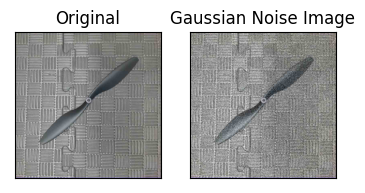

In [24]:
#adding noise
noise=iaa.AdditiveGaussianNoise(10,50)
input_noise=noise.augment_image(input_img)

image_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']

for i in range(len(image_list)):
    plt.subplot(1, 3, i+1)
    plt.title(labels[i])
    plt.imshow(image_list[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

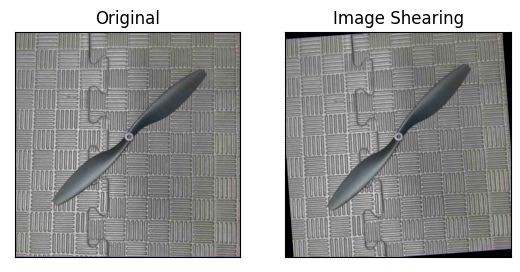

In [25]:
#image shearing
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(input_img)

image_list=[input_img, input_shear]
labels = ['Original', 'Image Shearing']

for i in range(len(image_list)):
    plt.subplot(1, 2, i+1)
    plt.title(labels[i])
    plt.imshow(image_list[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

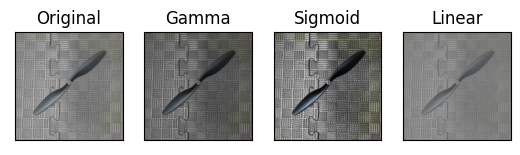

In [26]:
#image contrast
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)

image_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma','Sigmoid','Linear']

for i in range(len(image_list)):
    plt.subplot(1, 4, i+1)
    plt.title(labels[i])
    plt.imshow(image_list[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

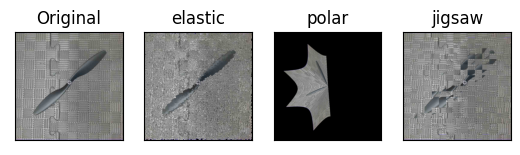

In [27]:
#image transformation
elastic = iaa.ElasticTransformation(alpha=60.0, sigma=4.0)
polar = iaa.WithPolarWarping(iaa.CropAndPad(percent=(-0.2, 0.7)))
jigsaw = iaa.Jigsaw(nb_rows=20, nb_cols=15, max_steps=(3, 7))
input_elastic = elastic.augment_image(input_img)
input_polar = polar.augment_image(input_img)
input_jigsaw = jigsaw.augment_image(input_img)

image_list=[input_img, input_elastic,input_polar,input_jigsaw]
labels = ['Original', 'elastic','polar','jigsaw']

for i in range(len(image_list)):
    plt.subplot(1, 4, i+1)
    plt.title(labels[i])
    plt.imshow(image_list[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [20]:
for i in range(25, 355, 30):
    print(i)

25
55
85
115
145
175
205
235
265
295
325
